In [1]:
import numpy  as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


(2062, 64, 64)

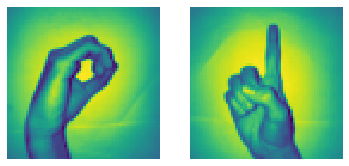

In [2]:
# load data set
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')
x_l.shape

In [3]:
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [4]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [6]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [7]:
def dummy(parameter):
    dummy_parameter = parameter+5
    return dummy_parameter
dummy(5)

10

In [8]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [9]:
#calculation of z
#z=np.dot(w.T , x_train)+b
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    
    return y_head

In [10]:
y_head=sigmoid(0)
y_head

0.5

In [23]:
#Forward propagation stepd:
#find z =  w.T*x+b
#y_head =sigmoid(z)
#loss(error)=los(y,y_head)
#cost = sum(loss)

def forward_backward_propagation(w,b,x_train , y_train):
    #forward propagation
    z=np.dot(w.T , x_train)+b
   
    y_head=sigmoid(z)
    
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    print("loss-->",loss)
    cost=(np.sum(loss))/x_train.shape[1]
    
    # backward propagation
    derivate_weight=(np.dot(x_train ,((y_head-y_train).T)))/x_train.shape[1]
    derivate_bias =np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivate_weight":derivate_weight , "derivate_bias":derivate_bias}
    return cost,gradients


In [24]:
def update(w, b, x_train , y_train , learning_rate , number_of_iteration):
    cost_list=[]
    cost_list2=[]
    index=[]
    
    for i in range(number_of_iteration):
    
        cost ,gradients =forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
       
        
        w=w - learning_rate*gradients["derivate_weight"]
        b=b - learning_rate*gradients["derivate_bias"]
        
        if i % 10 == 0 :
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f"%(i, cost))
            
    parameters={"weight": w , "bias":b}
    
    plt.plot(index,cost_list2)
    plt.xticks(index , rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("cost")
    plt.show()
    return parameters , gradients , cost_list     

In [25]:
#prediction
def predict(w ,b ,x_test):
    #x_test is a a input for forward propagation
    
    z=sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction=np.zeros((1,x_test.shape[1]))
    #if z is bigger than 0.5 , our prediction is sign one(y_head=1),
    #if z is smaller than 0.5 our prediction is sign zero(y_head=0),
    for i in range(z.shape[1]):
        if z[0,i] <=0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
    return Y_prediction

loss--> [[6.43929354e-15 2.90351482e+01 3.07087689e-13 3.30992144e+01
  2.86976432e+01 2.79257444e+01 2.89436262e+01 2.93590417e+01
  8.40216785e-13 2.68885087e+01 2.10942375e-14 9.84767823e-13
  2.80429686e+01 2.07833750e-13 1.79789517e-12 2.71456977e+01
  2.79392521e+01 2.86571825e+01 2.85003800e+01 5.02042852e-13
  2.84825318e+01 3.86579657e-13 3.10862447e-15 3.20924097e+01
  2.94437829e+01 2.69965381e+01 3.90798505e-13 5.22248911e-13
  2.83218616e+01 2.78186859e+01 2.11164419e-13 2.74165301e+01
  2.82608461e+01 2.71948569e+01 2.33812969e-13 2.80012754e+01
  2.92591963e+01 1.44861900e-12 2.76497584e+01 2.14050999e-13
  3.26405569e-13 3.91908728e-13 3.26227934e-12 2.73861767e+01
  2.75196832e+01 2.55277950e+01 2.78891532e+01 2.80568085e+01
  2.83465321e+01 3.38464288e+01 2.78731848e+01 2.81374745e+01
  8.65973959e-15 1.77857729e-13 2.76595346e+01 5.55999691e-13
  1.78745907e-12 1.78523862e-13 4.20774526e-13 2.73633215e+01
  2.83267473e+01 1.21280763e-12 2.90212299e-13 2.73514544e-12


loss--> [[3.17523785e-14 2.76227509e+01 1.24389388e-12 3.14897765e+01
  2.72955072e+01 2.65635913e+01 2.75450316e+01 2.79332262e+01
  3.25095506e-12 2.55736596e+01 9.85878046e-14 3.78364007e-12
  2.66761383e+01 8.61311023e-13 6.70841160e-12 2.58224760e+01
  2.65762706e+01 2.72588788e+01 2.71105168e+01 1.99595895e-12
  2.71022388e+01 1.55697677e-12 1.53210777e-14 3.05423952e+01
  2.80106439e+01 2.56819185e+01 1.56541446e-12 2.06124007e-12
  2.69382292e+01 2.64624394e+01 8.74633699e-13 2.60770971e+01
  2.68843958e+01 2.58665954e+01 9.64117675e-13 2.66539960e+01
  2.78348893e+01 5.44919665e-12 2.63040386e+01 8.82405260e-13
  1.32716060e-12 1.57185376e-12 1.18147714e-11 2.60541716e+01
  2.61801028e+01 2.42801326e+01 2.65291426e+01 2.66868777e+01
  2.69653598e+01 3.22369909e+01 2.65218656e+01 2.67661218e+01
  4.13002965e-14 7.40296713e-13 2.63189935e+01 2.18669527e-12
  6.65600908e-12 7.41628980e-13 1.68665082e-12 2.60263908e+01
  2.69433511e+01 4.61564120e-12 1.18505206e-12 1.00144337e-11


  3.04341816e+01 1.00528474e-11 1.27784450e-11 2.45665520e+01]]
loss--> [[1.38999923e-13 2.63112508e+01 4.55946392e-12 2.99962812e+01
  2.59935146e+01 2.52988357e+01 2.62461932e+01 2.66096096e+01
  1.14193099e-11 2.43526738e+01 4.11670698e-13 1.32041045e-11
  2.54070290e+01 3.22497584e-12 2.27842190e-11 2.45937636e+01
  2.53106974e+01 2.59603474e+01 2.58198593e+01 7.18958226e-12
  2.58204402e+01 5.67768055e-12 6.90558721e-14 2.91063393e+01
  2.66797339e+01 2.44611459e+01 5.67923486e-12 7.37609973e-12
  2.56532744e+01 2.52031513e+01 3.27271543e-12 2.48334018e+01
  2.56064834e+01 2.46331926e+01 3.59179353e-12 2.54030975e+01
  2.65126073e+01 1.86457516e-11 2.50545206e+01 3.28648220e-12
  4.88165064e-12 5.70810066e-12 3.90305566e-11 2.48173972e+01
  2.49362480e+01 2.31215719e+01 2.52661565e+01 2.54148419e+01
  2.56830575e+01 3.07013191e+01 2.52670749e+01 2.54925392e+01
  1.75637282e-13 2.78221890e-12 2.50742662e+01 7.79731835e-12
  2.25648389e-11 2.78266299e-12 6.12154771e-12 2.47849623e+0

  2.89264479e+01 3.53121976e-11 4.41733317e-11 2.33569865e+01]]
loss--> [[6.08846307e-13 2.49997400e+01 1.67112990e-11 2.84993213e+01
  2.46916129e+01 2.40340884e+01 2.49472894e+01 2.52860271e+01
  4.01099154e-11 2.31317024e+01 1.71795911e-12 4.60793625e-11
  2.41379496e+01 1.20754517e-11 7.73827669e-11 2.33650335e+01
  2.40451032e+01 2.46618508e+01 2.45292191e+01 2.58959520e-11
  2.45385887e+01 2.07054374e-11 3.12638804e-13 2.76696380e+01
  2.53487356e+01 2.32403802e+01 2.06052952e-11 2.63959965e-11
  2.43683200e+01 2.39438472e+01 1.22446497e-11 2.35896743e+01
  2.43285057e+01 2.33997937e+01 1.33810740e-11 2.41521614e+01
  2.51902082e+01 6.38020747e-11 2.38050071e+01 1.22417632e-11
  1.79560811e-11 2.07294182e-11 1.28938416e-10 2.35806079e+01
  2.36924031e+01 2.19630170e+01 2.40031868e+01 2.41428160e+01
  2.44007089e+01 2.91767201e+01 2.40122794e+01 2.42190169e+01
  7.48068274e-13 1.04563025e-11 2.38294985e+01 2.78046475e-11
  7.64972530e-11 1.04392051e-11 2.22188934e-11 2.35435278e+0

loss--> [[2.37942999e-12 2.37890906e+01 5.54267743e-11 2.71185980e+01
  2.34898507e+01 2.28666333e+01 2.37483069e+01 2.40642304e+01
  1.27908129e-10 2.20046481e+01 6.42308429e-12 1.46066936e-10
  2.29664840e+01 4.08471035e-11 2.39225084e-10 2.22308264e+01
  2.28768579e+01 2.34632349e+01 2.33378606e+01 8.45183923e-11
  2.33553521e+01 6.83550994e-11 1.25943700e-12 2.63437519e+01
  2.41201227e+01 2.21135194e+01 6.77033984e-11 8.56361648e-11
  2.31822029e+01 2.27814116e+01 4.13908907e-11 2.24416257e+01
  2.31488483e+01 2.22612736e+01 4.50550708e-11 2.29974543e+01
  2.39695476e+01 1.98605576e-10 2.26516171e+01 4.12112566e-11
  5.97504268e-11 6.81721346e-11 3.88544086e-10 2.24389540e+01
  2.25442408e+01 2.08935803e+01 2.28373644e+01 2.29686395e+01
  2.32170043e+01 2.77685318e+01 2.28539997e+01 2.30434486e+01
  2.84927637e-12 3.54924978e-11 2.26804904e+01 8.99109676e-11
  2.36088704e-10 3.53765905e-11 7.30322469e-11 2.23975845e+01
  2.31878266e+01 1.73672854e-10 5.40285594e-11 3.39244632e-10


  2.60276857e+01 3.95562916e-10 4.79835949e-10 2.10308974e+01]]
loss--> [[1.04185549e-11 2.24775572e+01 2.03152162e-10 2.56226228e+01
  2.21879418e+01 2.16018900e+01 2.24494131e+01 2.27406248e+01
  4.49277504e-10 2.07836730e+01 2.68052247e-11 5.09742026e-10
  2.16973987e+01 1.52941881e-10 8.12486079e-10 2.10021014e+01
  2.16112597e+01 2.21647315e+01 2.20472281e+01 3.04426040e-10
  2.20735128e+01 2.49276599e-10 5.69788661e-12 2.49074307e+01
  2.27891378e+01 2.08927518e+01 2.45639065e-10 3.06456416e-10
  2.18972447e+01 2.15221081e+01 1.54861901e-10 2.11979043e+01
  2.18708839e+01 2.10278766e+01 1.67853731e-10 2.17465250e+01
  2.26471705e+01 6.79586165e-10 2.14021095e+01 1.53504987e-10
  2.19776641e-10 2.47576404e-10 1.28356947e-09 2.12021629e+01
  2.13003987e+01 1.97350242e+01 2.15743905e+01 2.16966138e+01
  2.19346564e+01 2.62427524e+01 2.15991956e+01 2.17699189e+01
  1.21298527e-11 1.33389744e-10 2.14357310e+01 3.20615090e-10
  8.00369327e-10 1.32718725e-10 2.65076627e-10 2.11561477e+0

  2.47520731e+01 1.14525944e-09 1.37057499e-09 2.00074178e+01]]
loss--> [[3.63464814e-11 2.13677992e+01 6.09731155e-10 2.43568082e+01
  2.10863261e+01 2.05317222e+01 2.13503489e+01 2.16206483e+01
  1.30073818e-09 1.97505401e+01 8.97910635e-11 1.46771395e-09
  2.06235575e+01 4.67392569e-10 2.28629071e-09 1.99624111e+01
  2.05403680e+01 2.10659966e+01 2.09551538e+01 9.00310049e-10
  2.09888800e+01 7.44978524e-10 2.04363193e-11 2.36920442e+01
  2.16629160e+01 1.98597947e+01 7.30933758e-10 9.01351216e-10
  2.08099720e+01 2.04565434e+01 4.72959672e-10 2.01455250e+01
  2.07895293e+01 1.99842325e+01 5.10790521e-10 2.06880451e+01
  2.15282360e+01 1.92444216e-09 2.03448339e+01 4.67053063e-10
  6.61607658e-10 7.37297557e-10 3.52821928e-09 2.01556476e+01
  2.02479171e+01 1.87547076e+01 2.05057211e+01 2.06202836e+01
  2.08495936e+01 2.49517128e+01 2.05374382e+01 2.06923164e+01
  4.13225010e-11 4.08931333e-10 2.03824725e+01 9.40167944e-10
  2.24871300e-09 4.06262357e-10 7.89034616e-10 2.01057008e+0

loss--> [[1.78285831e-10 1.99553800e+01 2.46963494e-09 2.27457581e+01
  1.96842696e+01 1.91696904e+01 1.99515398e+01 2.01952237e+01
  5.03241783e-09 1.84356436e+01 4.18248325e-10 5.63888982e-09
  1.92568504e+01 1.93710204e-09 8.53075736e-09 1.86391688e+01
  1.91774149e+01 1.96676067e+01 1.95652413e+01 3.57875707e-09
  1.96084382e+01 3.00108072e-09 1.03839159e-10 2.21451960e+01
  2.02295441e+01 1.85451221e+01 2.92831004e-09 3.55794084e-09
  1.94261698e+01 1.91003699e+01 1.95858885e-09 1.88061329e+01
  1.94132597e+01 1.86559585e+01 2.10555840e-09 1.93408894e+01
  2.01041368e+01 7.23859686e-09 1.89992103e+01 1.92488026e-09
  2.68999845e-09 2.95685921e-09 1.27778021e-08 1.88237188e+01
  1.89083949e+01 1.75070318e+01 1.91455964e+01 1.92504090e+01
  1.94686045e+01 2.33085449e+01 1.91861107e+01 1.93208223e+01
  1.96653582e-10 1.70163861e-09 1.90419620e+01 3.69701359e-09
  8.37403828e-09 1.68729986e-09 3.16241234e-09 1.87687684e+01
  1.94323207e+01 6.53487577e-09 2.46312948e-09 1.14920633e-08


  2.15050995e+01 1.71439263e-08 1.98219647e-08 1.74021974e+01]]
loss--> [[8.74524675e-10 1.85429611e+01 1.00029286e-08 2.11347086e+01
  1.82822129e+01 1.78076588e+01 1.85527309e+01 1.87697992e+01
  1.94698878e-08 1.71207472e+01 1.94820893e-09 2.16643543e-08
  1.78901435e+01 8.02829151e-09 3.18305195e-08 1.73159266e+01
  1.78144620e+01 1.82692170e+01 1.81753289e+01 1.42256590e-08
  1.82279965e+01 1.20895900e-08 5.27616839e-10 2.05983481e+01
  1.87961721e+01 1.72304495e+01 1.17315701e-08 1.40444084e-08
  1.80423679e+01 1.77441964e+01 8.11077442e-09 1.74667409e+01
  1.80369903e+01 1.73276844e+01 8.67943998e-09 1.79937335e+01
  1.86800378e+01 2.72272574e-08 1.76535868e+01 7.93306990e-09
  1.09371345e-08 1.18581928e-08 4.62760977e-08 1.74917900e+01
  1.75688729e+01 1.62593562e+01 1.77854716e+01 1.78805345e+01
  1.80876152e+01 2.16653823e+01 1.78347832e+01 1.79493284e+01
  9.35874934e-10 7.08083217e-09 1.77014515e+01 1.45377320e-08
  3.11842891e-08 7.00773975e-09 1.26747934e-08 1.74318360e+0

loss--> [[3.82908284e-09 1.72314293e+01 3.66630921e-08 1.96387335e+01
  1.69803033e+01 1.65429152e+01 1.72538370e+01 1.74461908e+01
  6.83879665e-08 1.58997720e+01 8.13032833e-09 7.56038901e-08
  1.66210585e+01 3.00599812e-08 1.08106787e-07 1.60872018e+01
  1.65488629e+01 1.69707122e+01 1.68846961e+01 5.12392195e-08
  1.69461579e+01 4.40881201e-08 2.38699061e-09 1.91619898e+01
  1.74651839e+01 1.60096823e+01 4.25639963e-08 5.02591269e-08
  1.67574091e+01 1.64848926e+01 3.03459986e-08 1.62230199e+01
  1.67590258e+01 1.60942872e+01 3.23354281e-08 1.67428032e+01
  1.73576602e+01 9.31658991e-08 1.64040793e+01 2.95493241e-08
  4.02294605e-08 4.30647073e-08 1.52874759e-07 1.62549991e+01
  1.63250311e+01 1.51008004e+01 1.65224988e+01 1.66085082e+01
  1.68052681e+01 2.01395893e+01 1.65799792e+01 1.66757984e+01
  3.98418677e-09 2.66116286e-08 1.64566918e+01 5.18403061e-08
  1.05718485e-07 2.62901575e-08 4.60041872e-08 1.61903989e+01
  1.67639345e+01 8.60350622e-08 3.71666629e-08 1.40417615e-07


Cost after iteration 130: 7.677861
loss--> [[1.87823444e-08 1.58190108e+01 1.48498931e-07 1.80276838e+01
  1.55782472e+01 1.51808841e+01 1.58550285e+01 1.60207667e+01
  2.64585638e-07 1.45848762e+01 3.78712074e-08 2.90466537e-07
  1.52543520e+01 1.24583114e-07 4.03374926e-07 1.47639602e+01
  1.51859105e+01 1.55723229e+01 1.54947841e+01 2.03677234e-07
  1.55657167e+01 1.77605048e-07 1.21285337e-08 1.76151427e+01
  1.60318122e+01 1.46950103e+01 1.70522348e-07 1.98389866e-07
  1.53736076e+01 1.51287196e+01 1.25666737e-07 1.48836284e+01
  1.53827569e+01 1.47660137e+01 1.33291620e-07 1.53956479e+01
  1.59335616e+01 3.50434052e-07 1.50584563e+01 1.21782514e-07
  1.63566948e-07 1.72706707e-07 5.53651065e-07 1.49230709e+01
  1.49855096e+01 1.38531256e+01 1.51623746e+01 1.52386342e+01
  1.54242793e+01 1.84964280e+01 1.52286522e+01 1.53043050e+01
  1.89607439e-08 1.10735852e-07 1.51161818e+01 2.03851071e-07
  3.93687505e-07 1.09188949e-07 1.84382450e-07 1.48534671e+01
  1.53803273e+01 3.27434709

  1.69825271e+01 7.43026264e-07 8.18841714e-07 1.37734998e+01]]
loss--> [[7.34073346e-08 1.46083673e+01 4.92529548e-07 1.66467848e+01
  1.43764858e+01 1.40134300e+01 1.46560508e+01 1.47989756e+01
  8.43745550e-07 1.34578240e+01 1.41596508e-07 9.20746834e-07
  1.40828904e+01 4.21423951e-07 1.24701218e-06 1.36297544e+01
  1.40176667e+01 1.43737046e+01 1.43034321e+01 6.64755710e-07
  1.43824823e+01 5.86328441e-07 4.88556049e-08 1.62892746e+01
  1.48032089e+01 1.35681499e+01 5.60291802e-07 6.43631474e-07
  1.41874931e+01 1.39662868e+01 4.24794631e-07 1.37355799e+01
  1.42030988e+01 1.36274949e+01 4.48798921e-07 1.42409443e+01
  1.47129067e+01 1.09084347e-06 1.39050663e+01 4.09976966e-07
  5.44283142e-07 5.67971898e-07 1.66837285e-06 1.37814193e+01
  1.38373495e+01 1.27836920e+01 1.39965550e+01 1.40644575e+01
  1.42405757e+01 1.70880050e+01 1.40703730e+01 1.41287403e+01
  7.22075695e-08 3.75876463e-07 1.39671743e+01 6.59187096e-07
  1.21501145e-06 3.70018144e-07 6.06051686e-07 1.37075268e+0

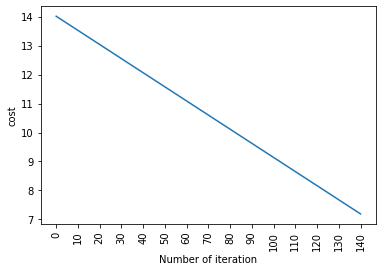

train acccuracy: 50.57471264367816 %
test accuracy : 46.7741935483871 %


In [26]:
def logistic_regression(x_train , y_train , x_test , y_test , learning_rate , num_iterations):
    #initialize
    dimension=x_train.shape[0] #this is 4096
    w,b = initialize_weights_and_bias(dimension)
    #do not change learning rate
    parameters , gradients , cost_list = update(w, b , x_train , y_train ,learning_rate ,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    
    #print train,test errors
    print("train acccuracy: {} %".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy : {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
          
logistic_regression(x_train , y_train , x_test , y_test ,learning_rate=0.0001 , num_iterations=150)

In [104]:
from sklearn import linear_model
logreg=linear_model.LogisticRegression(random_state=42 , max_iter=150)
print("test accuracy : {}".format(logreg.fit(x_train.T , y_train.T).score(x_test.T , y_test.T)))
print("train accuracy: {}".format(logreg.fit(x_train.T,y_train.T).score(x_train.T,y_train.T)))

C:\Users\mmuca\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mmuca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mmuca\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

test accuracy : 0.967741935483871
train accuracy: 1.0


C:\Users\mmuca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
